In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/MSCIT/Desktop/data_science_job.csv')
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [9]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9495,0.920,no_enrollment,Graduate,5.0,25.0
6972,0.910,no_enrollment,Graduate,9.0,94.0
16758,0.558,Part time course,Graduate,3.0,330.0
13467,0.804,no_enrollment,Primary School,6.0,9.0
3869,0.804,no_enrollment,Graduate,10.0,NaN


In [13]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [14]:
len(df[cols].dropna()) /len(df)

0.8968577095730244

In [15]:
df[cols].dropna()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [16]:
len(df)

19158

In [17]:
newdf = df[cols].dropna()
newdf.shape, df.shape

((17182, 5), (19158, 13))

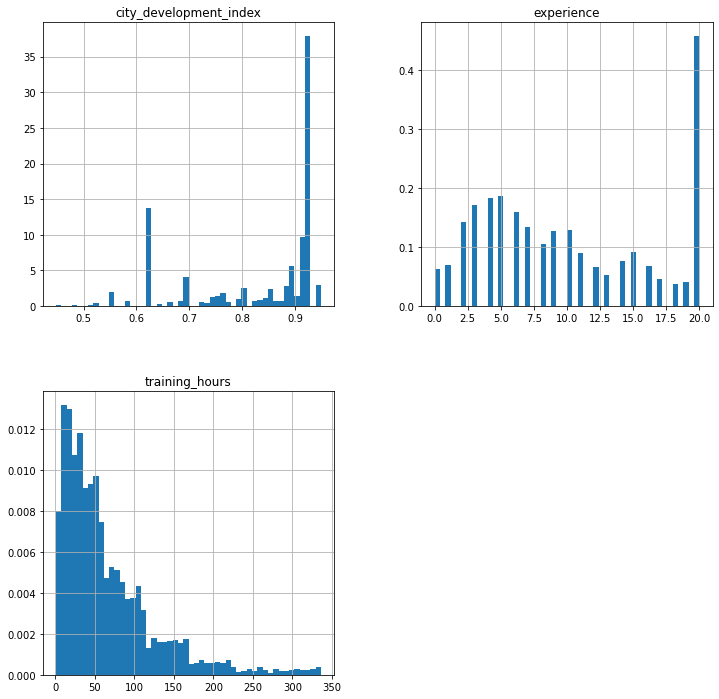

In [19]:
newdf.hist(bins=50 , density =True , figsize = (12,12))
plt.show()

<AxesSubplot:>

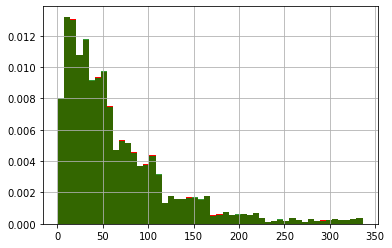

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original data 
df['training_hours'].hist(bins = 50 , ax = ax , density = True , color = 'red')

#data after cca, the argument alpha makes the color tranparent , so we can 
#see the overlay of the 2 distribution
newdf['training_hours'].hist(bins = 50 , ax=ax , color = 'green' , density =True , alpha = 0.8)